# Pneumonia Detection Using ResNet 50

## Importing & Installing Libraries

In [1]:
import os
import glob

In [2]:
import seaborn as sns
import numpy  as np
import pandas as pd
import os
import matplotlib.pyplot as plt


C:\Users\ashar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from zipfile import ZipFile
file_name= "data1.zip"  #Dataset
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print ("done")

done


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow. keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report


## Exploratory Data Analysis

In [6]:
import os
import warnings

warnings.filterwarnings('ignore')
data_dir_list= os.listdir("chest_xray")
print(data_dir_list)

['test', 'train', 'val']


In [7]:
import os
import warnings

warnings.filterwarnings('ignore')
data_dir_list= os.listdir("chest_xray/test")
print(data_dir_list)

['NORMAL', 'PNEUMONIA']


In [8]:
import os
import warnings

warnings.filterwarnings('ignore')
data_dir_list= os.listdir("chest_xray/train")
print(data_dir_list)

['NORMAL', 'PNEUMONIA']


In [9]:
import os
import warnings

warnings.filterwarnings('ignore')
data_dir_list= os.listdir("chest_xray/val")
print(data_dir_list)

['NORMAL', 'PNEUMONIA']


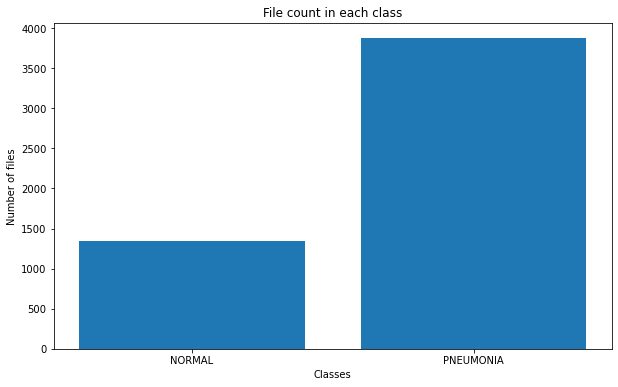

In [10]:
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
plt.bar(data_dir_list,[len(os.listdir(os.path.join("chest_xray/train",d))) for d in data_dir_list])
plt.xlabel("Classes")
plt.ylabel("Number of files")
plt.title("File count in each class")
plt.show()


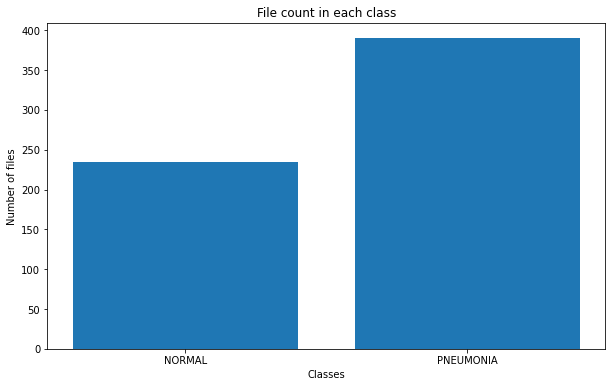

In [11]:
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
plt.bar(data_dir_list,[len(os.listdir(os.path.join("chest_xray/test",d))) for d in data_dir_list])
plt.xlabel("Classes")
plt.ylabel("Number of files")
plt.title("File count in each class")
plt.show()


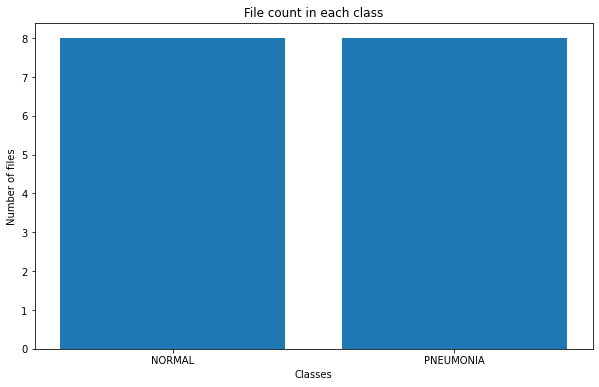

In [12]:
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
plt.bar(data_dir_list,[len(os.listdir(os.path.join("chest_xray/val",d))) for d in data_dir_list])
plt.xlabel("Classes")
plt.ylabel("Number of files")
plt.title("File count in each class")
plt.show()


## Extracting Labels from File Paths Based on Parent Directories
​

In [13]:
file_path='chest_xray/train'

In [14]:
name_class = os.listdir(file_path)
name_class

['NORMAL', 'PNEUMONIA']

In [15]:
import os, glob
filepaths =list (glob.glob (file_path+'/**/*.*'))
filepaths

['chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0140-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0141-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0143-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0145-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0147-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0149-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0151-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0152-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0154-0001

In [16]:
labels = list (map (lambda x: os.path.split(os.path.split(x)[0]) [1], filepaths))
labels

['NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',

### Creating a Pandas DataFrame with File Paths and Corresponding Labels


In [17]:
import pandas as pd
filepath = pd.Series (filepaths, name='Filepath').astype(str) 
labels= pd.Series (labels, name='Label')
data= pd.concat([filepath, labels], axis=1)
data= data.sample (frac=1).reset_index (drop=True) 
data.head (5)

,Filepath,Label
0,chest_xray/train\PNEUMONIA\person434_bacteria_...,PNEUMONIA
1,chest_xray/train\NORMAL\NORMAL2-IM-1019-0001.jpeg,NORMAL
2,chest_xray/train\PNEUMONIA\person585_bacteria_...,PNEUMONIA
3,chest_xray/train\PNEUMONIA\person262_bacteria_...,PNEUMONIA
4,chest_xray/train\NORMAL\NORMAL2-IM-0501-0001.jpeg,NORMAL


In [18]:
import os
import glob
import pandas as pd

# Function to get file paths and labels
def get_filepaths_and_labels(folder_path):
    filepaths = glob.glob(os.path.join(folder_path, '**', '*.*'), recursive=True)
    labels = [os.path.split(os.path.split(path)[0])[1] for path in filepaths]
    return pd.DataFrame({'Filepath': filepaths, 'Label': labels})

# Add other file paths and labels
additional_file_path = 'chest_xray/train'
additional_data = get_filepaths_and_labels(additional_file_path)

# Concatenate with the existing data
data = pd.concat([data, additional_data], ignore_index=True)

# Shuffle the DataFrame
data = data.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the updated DataFrame
data.head(5)


,Filepath,Label
0,chest_xray/train\PNEUMONIA\person1351_bacteria...,PNEUMONIA
1,chest_xray/train\NORMAL\NORMAL2-IM-0936-0001.jpeg,NORMAL
2,chest_xray/train\PNEUMONIA\person1493_bacteria...,PNEUMONIA
3,chest_xray/train\PNEUMONIA\person1223_virus_20...,PNEUMONIA
4,chest_xray/train\PNEUMONIA\person1905_bacteria...,PNEUMONIA


In [46]:
data.sample(10, random_state=42)

,Filepath,Label
4582,chest_xray/train\NORMAL\IM-0492-0001.jpeg,NORMAL
177,chest_xray/test\PNEUMONIA\person121_bacteria_5...,PNEUMONIA
167,chest_xray/train\PNEUMONIA\person1665_bacteria...,PNEUMONIA
3722,chest_xray/train\PNEUMONIA\person1575_bacteria...,PNEUMONIA
2339,chest_xray/train\PNEUMONIA\person830_virus_146...,PNEUMONIA
1047,chest_xray/train\PNEUMONIA\person724_virus_134...,PNEUMONIA
4676,chest_xray/train\PNEUMONIA\person719_bacteria_...,PNEUMONIA
3955,chest_xray/test\PNEUMONIA\person125_bacteria_5...,PNEUMONIA
2534,chest_xray/train\PNEUMONIA\person637_virus_121...,PNEUMONIA
1501,chest_xray/train\PNEUMONIA\person1482_virus_25...,PNEUMONIA


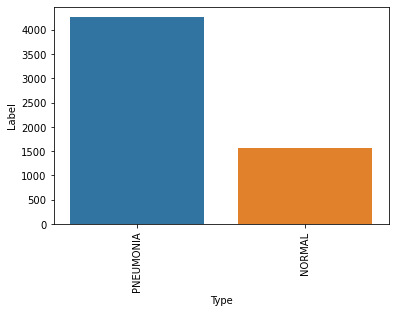

In [19]:
counts= data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

## Splitting the Dataset into Training and Testing Sets







In [20]:
train,test = train_test_split(data, test_size=0.25 , random_state=42)
#train = 'chest_xray/train'
#test = 'chest_xray/test'

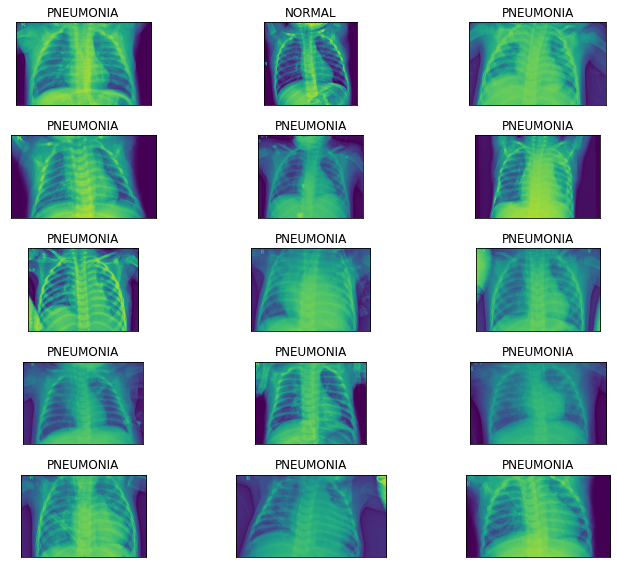

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks': [],'yticks':[]}) 
for i, ax in enumerate (axes. flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label [i])
plt.tight_layout()
plt.show()

### Setting Up Image Data Generators for Training and Testing

In [22]:
train_datagen = ImageDataGenerator (preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator (preprocessing_function=preprocess_input)


In [23]:
train_gen =train_datagen.flow_from_dataframe(
    dataframe= train, 
    x_col='Filepath', 
    y_col='Label',
    target_size=(224, 224), 
    class_mode='categorical',
    batch_size =32,
    shuffle=True,
    seed=42
)
valid_gen= train_datagen.flow_from_dataframe( 
    dataframe=test,
    x_col='Filepath', 
    y_col='Label',
    target_size=(224, 224), 
    class_mode='categorical', 
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen= test_datagen.flow_from_dataframe( 
    dataframe=test,
    x_col='Filepath', 
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4380 validated image filenames belonging to 2 classes.
Found 1460 validated image filenames belonging to 2 classes.
Found 1460 validated image filenames belonging to 2 classes.


## Modelling

In [24]:
pretrained_model = ResNet50( 
    input_shape=(244,244, 3), 
    include_top=False, 
    weights='imagenet', 
    pooling='avg'
)
pretrained_model.trainable = False

In [25]:
inputs = pretrained_model.input
x = Dense (128, activation='relu') (pretrained_model.output) 
x = Dense (128, activation='relu') (x)
outputs = Dense (2, activation='softmax')(x)
model = Model (inputs=inputs, outputs=outputs)

In [26]:
model.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=2,
                               mode='auto')]


In [29]:
history= model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=my_callbacks
)

Epoch 1/10
137/137 [==============================] - 306s 2s/step - loss: 0.1276 - accuracy: 0.9514 - val_loss: 0.1485 - val_accuracy: 0.9411
Epoch 2/10
137/137 [==============================] - 265s 2s/step - loss: 0.1102 - accuracy: 0.9568 - val_loss: 0.1333 - val_accuracy: 0.9486
Epoch 3/10
137/137 [==============================] - 256s 2s/step - loss: 0.0919 - accuracy: 0.9635 - val_loss: 0.2749 - val_accuracy: 0.9068
Epoch 4/10
137/137 [==============================] - 236s 2s/step - loss: 0.0781 - accuracy: 0.9685 - val_loss: 0.1456 - val_accuracy: 0.9466


In [30]:
model.save("restnet50.h5")

## Visualizing Training and Validation Accuracy, Loss Over Epochs






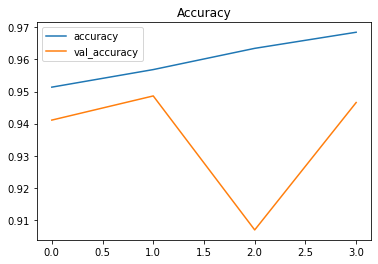

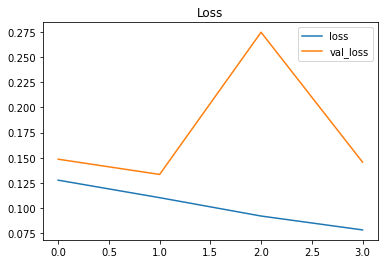

In [31]:
pd.DataFrame(history.history) [['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(history.history) [['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

## Evaluation

In [32]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss:{:.5f}".format(results[0]))
print("Test Accuracy:{:.2f}%".format(results[1]*100))

Test Loss:0.14558
Test Accuracy:94.66%


In [33]:
pred= model.predict(test_gen)
pred= np.argmax(pred,axis=1)
#Map the label

labels =(train_gen.class_indices)
labels= dict((v,k) for k, v in labels.items()) 
pred= [labels[k] for k in pred]

46/46 [==============================] - 63s 1s/step


In [34]:
y_test= list(test.Label)
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

      NORMAL       0.90      0.91      0.90       404
   PNEUMONIA       0.97      0.96      0.96      1056

    accuracy                           0.95      1460
   macro avg       0.93      0.94      0.93      1460
weighted avg       0.95      0.95      0.95      1460



## Visualizing True and Predicted Labels for Test Set Samples






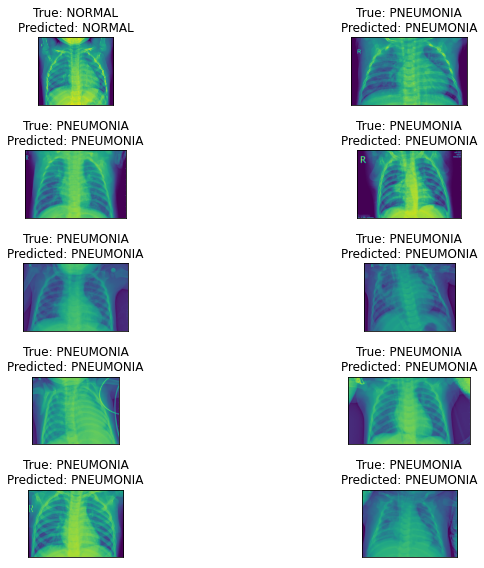

In [35]:
fig, axes= plt.subplots (nrows=5, ncols=2, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate (axes.flat):
    ax.imshow(plt.imread(test. Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## Predictions (Outcome)

In [36]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path = 'chest_xray/test/PNEUMONIA/person1_virus_7.jpeg'

img = cv2.imread(img_path) 
img = cv2.resize(img, (100, 100))

x= np.expand_dims(img, axis=0) 
x = preprocess_input(x)
result = model.predict(x) 
print((result*100).astype('int'))


1/1 [==============================] - 3s 3s/step
[[ 0 99]]


In [45]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path = 'IM-0005-0001.jpeg'

img = cv2.imread(img_path) 
img = cv2.resize(img, (100, 100))

x= np.expand_dims(img, axis=0) 
x = preprocess_input(x)
result = model.predict(x) 
print((result*100).astype('int'))


1/1 [==============================] - 0s 112ms/step
[[99  0]]


In [37]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path = 'chest_xray/test/NORMAL/IM-0005-0001.jpeg'

img = cv2.imread(img_path) 
img = cv2.resize(img, (224, 224))

x= np.expand_dims(img, axis=0) 
x = preprocess_input(x)
result = model.predict(x) 
print((result*100).astype('int'))


1/1 [==============================] - 0s 103ms/step
[[99  0]]


## Classification Report & Confusion Matrix

46/46 [==============================] - 71s 2s/step
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       404
           1       0.97      0.96      0.96      1056

    accuracy                           0.95      1460
   macro avg       0.93      0.94      0.93      1460
weighted avg       0.95      0.95      0.95      1460



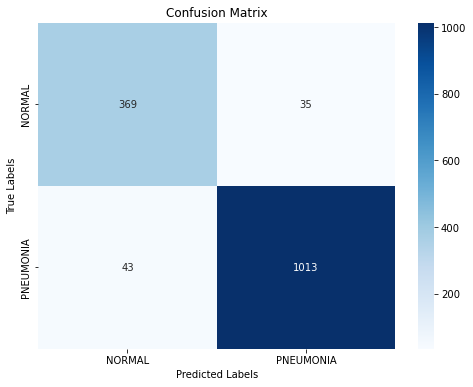

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions on the test set
pred_probabilities = model.predict(test_gen)
pred_labels = np.argmax(pred_probabilities, axis=1)

# Map the numerical labels to class names
class_labels = {v: k for k, v in train_gen.class_indices.items()}
true_labels = test_gen.classes

# Display a classification report
print(classification_report(true_labels, pred_labels))

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
